In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/Minimum Wage Data.csv", encoding="utf-8")

actual_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if actual_min_wage.empty:
        actual_min_wage = group.set_index("Year")[ ["State.Minimum.Wage.2020.Dollars"] ].rename(
            columns={"State.Minimum.Wage.2020.Dollars" : name}
        )
    else:
        actual_min_wage = actual_min_wage.join(group.set_index("Year")
            [ ["State.Minimum.Wage.2020.Dollars"] ].rename(
            columns={"State.Minimum.Wage.2020.Dollars" : str(name) + " Min Wage"}
        ))

# actual_min_wage.head()

min_wage_corr = actual_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head() 

# as we can see, we then get the correlation between each of the state min wages


,Alaska Min Wage,Arkansas Min Wage,California Min Wage,Colorado Min Wage,Connecticut Min Wage,Delaware Min Wage,District of Columbia Min Wage,Guam Min Wage,Hawaii Min Wage,Idaho Min Wage,...,Oregon Min Wage,Pennsylvania Min Wage,Rhode Island Min Wage,South Dakota Min Wage,Utah Min Wage,Vermont Min Wage,Washington Min Wage,West Virginia Min Wage,Wisconsin Min Wage,Wyoming Min Wage
Alaska Min Wage,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas Min Wage,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California Min Wage,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado Min Wage,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut Min Wage,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


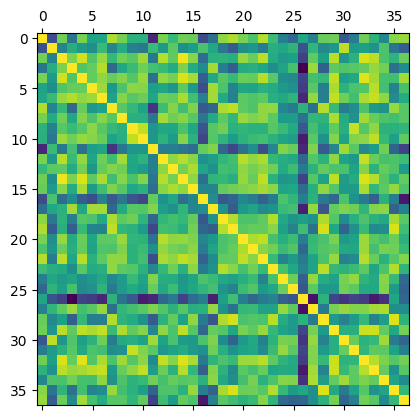

In [2]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

# but as we can see, we have the axis as the labels, so we need to change that

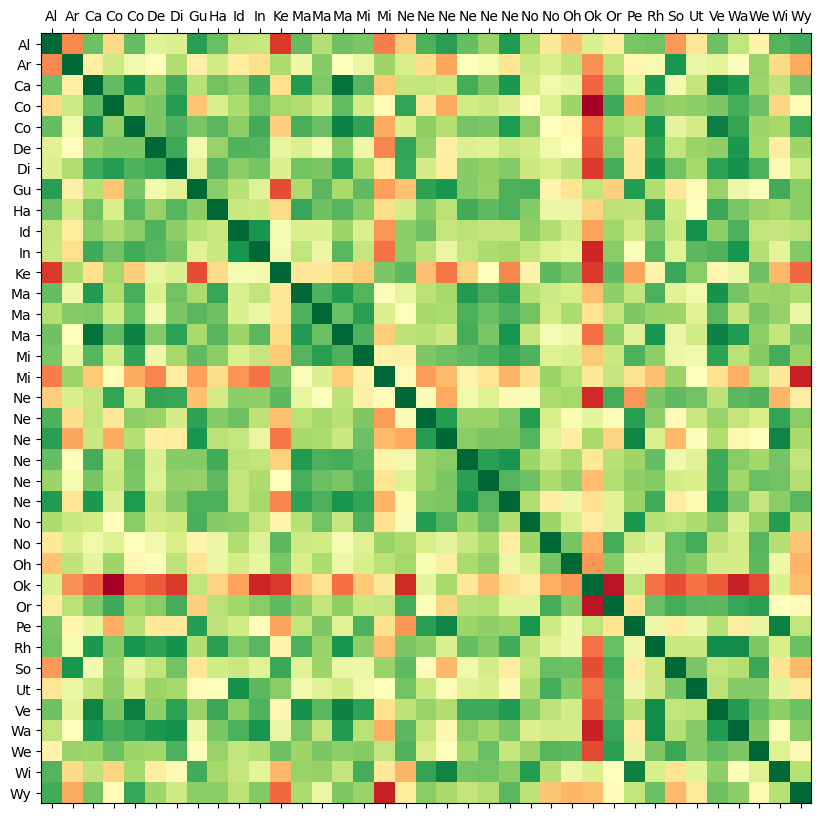

In [3]:

labels = [col[:2] for col in min_wage_corr.columns]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.savefig("stateMinWag_Corr.jpg")

plt.show()

plt.close(fig)

In [6]:
labels

# as we can see, we have some duplicate states

# one fix we can do is manually delete the duplicates by hand
# OR
# we can go ONLINE AND LOOK FOR A STATE ABBREVIATIONS and scrape data

# e.g. : https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [11]:
# so getting data of state abbreviations from a website such as this one:
    # https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes

import pandas as pd
import requests

webscraped_data = requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
state_dataframes = pd.read_html(webscraped_data.text)

In [12]:
for df in state_dataframes:
    print(df.head())

    # we get 2 dataframes, the states and territory

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [13]:
# but we want to focus on the first dataframe (the states)
# hence we can use state_dataframes[0]

state_abbr = state_dataframes[0]
state_abbr.head()

# as we can see we get columns State Name, Postal Abbreviation & Postal Code
    # the BEST abbreviation to use would be the Postal Code column, so we want that


,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
